In [38]:
import polars as pl 
import pandas as pd
from ssa import *
import matplotlib.pyplot as plt 

In [8]:
data = pd.read_parquet("../data/afrr_price.parquet")

In [9]:
data["prod_unbalance"] = data[["wind_offshore_dayahead", "wind_onshore_dayahead", "solar_dayahead"]].sum(axis=1) - data["load_forecasts"]

In [10]:
data = data[['wind_offshore_dayahead', 'wind_onshore_dayahead',
       'solar_dayahead','aFRR_DownCapPriceEUR', 'aFRR_UpCapPriceEUR', 'load_forecasts',
       'da_price', 'prod_unbalance']]

In [11]:
data = data.dropna()

In [40]:
ts = data["aFRR_UpCapPriceEUR"]

In [ ]:
ts = data["aFRR_UpCapPriceEUR"]
ssa_ts = mySSA(data["aFRR_UpCapPriceEUR"])
ssa_ts.embed(embedding_dimension=128, suspected_frequency=24, verbose=True)
ssa_ts.decompose(True)
components = [i for i in range(10)]
ts_clean = ssa_ts.view_reconstruction(*[ssa_ts.Xs[i] for i in components], names=components, return_df=True, plot=False)

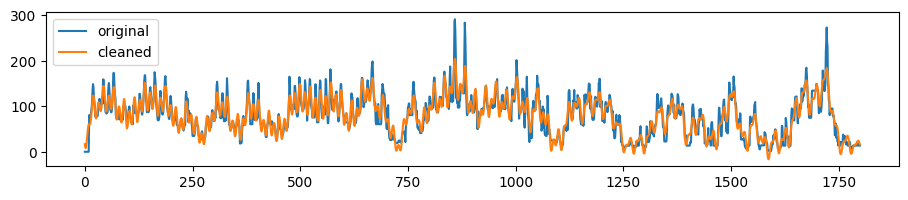

In [ ]:
plt.plot(ts.values[:1800], label="original")
plt.plot(ts_clean[:1800], label= "cleaned")
plt.legend()